<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/MachineLearningWeek7_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
url = '50_Startups.csv'
data = pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Vẽ bảng giá trị tương quan
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<Axes: >

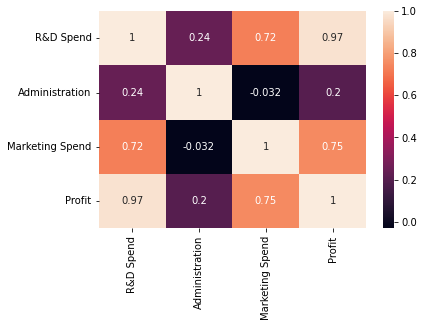

In [6]:
sns.heatmap(correlation, annot = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Profit', ylabel='R&D Spend'>

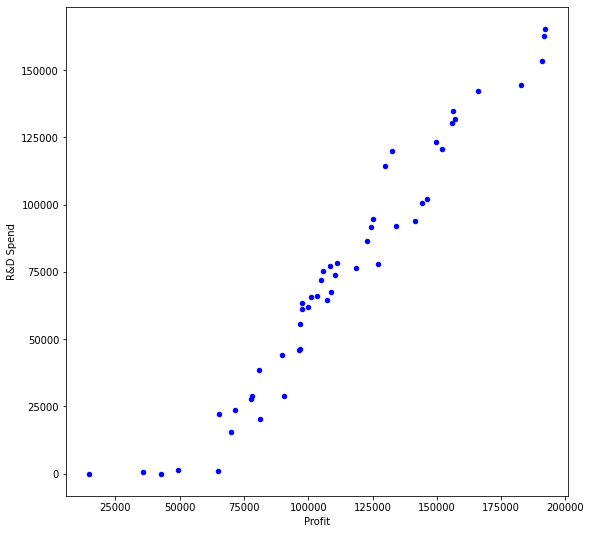

In [7]:
data.plot( kind = 'scatter', x = 'Profit', y = 'R&D Spend', figsize = (9,9), color = 'blue')

In [8]:
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Profit']), y=data['R&D Spend'])

LinearRegression()

In [9]:
print('Intercept = ', model.intercept_)
print('Coeffient = ', model.coef_)
print('Accuracy = ', model.score(X=pd.DataFrame(data['Profit']), y=data['R&D Spend']))

Intercept =  -50385.82883510302
Coeffient =  [1.10797715]
Accuracy =  0.9465353160804393


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


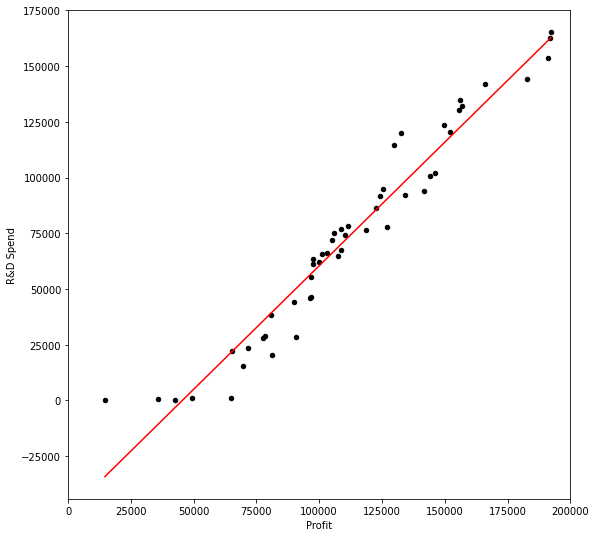

In [11]:
data.plot( kind = 'scatter', x = 'Profit', y = 'R&D Spend', figsize = (9,9), color = 'black', xlim = (0,200000))
y_prediction = model.predict( X=pd.DataFrame(data['Profit']))
plt.plot(data['Profit'], y_prediction,color = 'red')

In [15]:
model2 = linear_model.LinearRegression()
X = pd.DataFrame([data['Profit'], data['Profit']**2]).T
model2.fit(X,y = data['R&D Spend'])

print('Intercept = ', model2.intercept_)
print('Coeffient = ', model2.coef_)
print('Accuracy = ', model2.score(X,y = data['R&D Spend']))


Intercept =  -37182.30912423563
Coeffient =  [8.39353178e-01 1.19427444e-06]
Accuracy =  0.9497292340096265


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


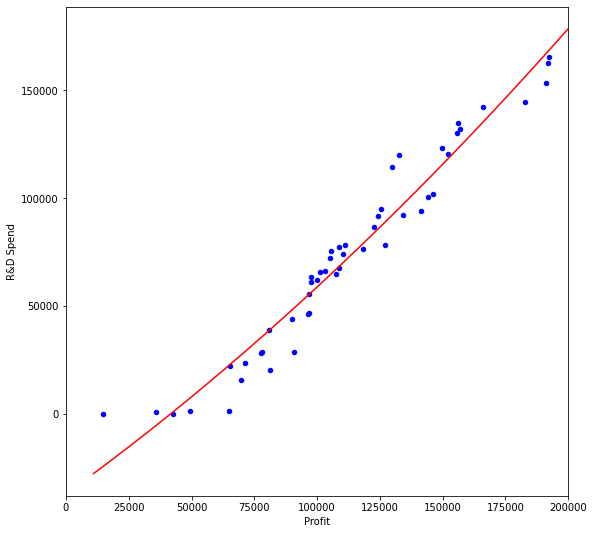

In [16]:
range = np.arange(11000,200000,1)
X_range = pd.DataFrame([range, range**2]).T
y_predict = model2.predict(X=X_range)
data.plot( kind = 'scatter', x = 'Profit', y = 'R&D Spend', figsize = (9,9), color = 'blue', xlim = (0,200000))
plt.plot(range, y_predict,color = 'red')

In [17]:
# Train with two vars
model3 = linear_model.LinearRegression()
model3.fit(X=data.loc[:,['Profit','Marketing Spend','Administration']], y = data['R&D Spend'])

print('Intercept = ', model3.intercept_)
print('Coeffient = ', model3.coef_)
print('Accuracy = ', model3.score(X=data.loc[:,['Profit','Marketing Spend','Administration']], y = data['R&D Spend']))


Intercept =  -59040.49561639009
Coeffient =  [1.08449919 0.00518381 0.08398047]
Accuracy =  0.9488830971212534
